# Code for generating Figure 1

## "Turnover and noise as key obstacles for molecular memory"

This Python notebook contains code for generating the first figure from the paper "Storing long-lived memories via molecular error correction: a minimal mathematical model of Crick's memory switch".

In [65]:
%load_ext autoreload
%autoreload 2

# imports
import numpy as np
import matplotlib.pyplot as plt

from functions.solutions import get_probs_noisefree_twostate, get_probs_twostate
from functions.gillespie import simulate_ssa

In [67]:
# aesthetics
lw = 4
sim_colors = ['chocolate', 'fuchsia', 'deepskyblue', 'gold'] 
c_red = (1,0,0)
c_green = np.array([57,181,74])/255
c_lightblue = np.array([187,214,255])/255

# ----------

# saving-related utility function
results_folder = 'results/fig1/'
format_list = ['.png', '.svg', '.pdf']

def save_file(name):
    for end in format_list:
        plt.savefig(results_folder+name+end, bbox_inches='tight', transparent=True)
    return

<center>
<img src="fig_images/fig1-intuition.png" width="1000"/></center>

**Caption:**  (a) Schematic of pure turnover model and three example stochastic simulations ($\gamma = 1$). (b) State occupancy probabilities over time for the pure turnover model ($\gamma = 1$). Shaded region: time before $\tau = 1/\gamma$. (c) Mean first-passage time vs $1/\gamma$ for the pure turnover model. (d) Schematic of the two-state model and three example stochastic simulations ($\gamma = 1, \epsilon = 0.1$). (e) State occupancy probabilities over time for the two-state model ($\gamma = 1, \epsilon = 0.1$). Shaded region: time before $\tau = 1/(\epsilon + \gamma)$. (f) Mean first-passage time $1/\gamma$ vs false-positive probability $\epsilon/(\epsilon + \gamma)$ for the two-state model ($\epsilon = 0.1$). Horizontal dashed line: $p_{\text{FP}} = 0.5$.

## a. Gillespie simulations, pure turnover model

Simulate the pure turnover model. Since there's only one possible transition, this amounts to drawing an exponentially-distributed waiting time. (That is, we don't need to use a more general-purpose Gillespie algorithm.)

In [24]:
num_samples = 3
t_max = 10

np.random.seed(3)

# for this simple model, only need to draw exponential waiting times
t_wait = np.random.exponential(scale=1, size=num_samples)

t_rec = np.zeros((3,num_samples)); counts = np.ones((3, num_samples))
for i in range(num_samples):
    t_rec[:,i] = np.array([0, t_wait[i], t_max])
    counts[1:,i] = np.array([0, 0])

arg = np.flip(np.argsort(t_rec[1,:]))

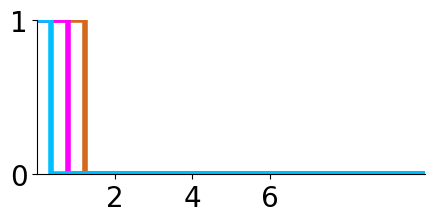

In [26]:
fig, ax = plt.subplots(figsize=(5,2))

for j in range(num_samples):
    ind = arg[j]
    plt.plot(t_rec[:,ind], counts[:,ind], drawstyle='steps-post', linewidth=lw, color=sim_colors[j])

ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0, 10); plt.ylim(0, 1)    
plt.xticks([2, 4, 6],fontsize=20); plt.yticks([0, 1], ['0', '1'], fontsize=20)

name = 'gillespie_pure_turnover'
save_file(name)
plt.show()

## b. State occupancy probabilities, pure turnover model

Plot state occupancy probabilities $p_0(t)$ (unmarked probability) and $p_1(t)$ (marked probability) over time for the pure turnover model.

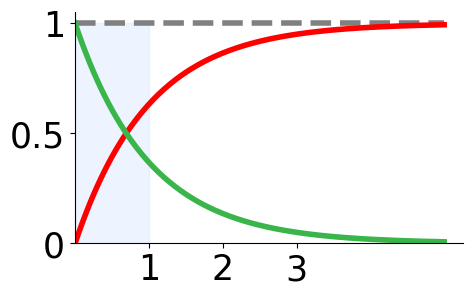

In [37]:
t_min, t_max, num_t = 0, 5, 200
t = np.linspace(t_min, t_max, num_t)

gamma = 1; params = {'gamma':gamma}
_, p_t = get_probs_noisefree_twostate(t, params)   # get turnover model probabilities; unused output is steady state dist
p_0, p_1 = p_t.T

# -------------------

fig, ax = plt.subplots(figsize=(5,3))

plt.fill_between(np.array([0,1]), np.array([1,1]), alpha=0.25, color=c_lightblue) 
plt.plot(t, np.ones_like(t), color='gray', linestyle='--', linewidth=lw)
plt.plot(t, p_0, linewidth=lw, color=c_red)
plt.plot(t, p_1, linewidth=lw, color=c_green)

ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0,None); plt.ylim(0, 1.05)
plt.xticks([1, 2, 3],fontsize=25)
plt.yticks([0,0.5, 1], ['0','0.5', '1'], fontsize=25)

name = 'state_occ_pure_turnover'
save_file(name)
plt.show()

## c. First-passage time vs turnover time scale

Plot average first-passage time vs turnover time scale ($1/\gamma$) for pure turnover model.

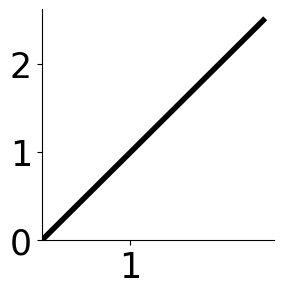

In [39]:
t_min, t_max, num_t = 0, 2.5, 200
t = np.linspace(t_min, t_max, num_t)

# ------------

# This plot is linear, so nothing really needs to be computed

fig, ax = plt.subplots(figsize=(3,3))
plt.plot(t, t, color='black', linewidth=lw)
ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0,None); plt.ylim(0, None)
plt.xticks([1, ],fontsize=25)
plt.yticks([0,  1,  2], fontsize=25)

name = 'fp_avg_pure_turnover'
save_file(name)
plt.show()

## d. Gillespie simulations, two-state model

Simulate the two-state model using the Gillespie algorithm.

In [53]:
# propensity function for the two-state model
def prop_twostate(state, params):
    eps, gamma = params['eps'], params['gamma']
    # state: (num_samples, D)
    return np.array( [ eps*(1 - state[:,0]), gamma*state[:,0] ]).T


params = {'eps':0.1, 'gamma':1}
prop = lambda state: prop_twostate(state, params)
stoich = np.array([[1],[-1]])

num_samples = 3; x0 = np.ones((num_samples, 1))

np.random.seed(84)  
num_steps = 10
t_rec, counts = simulate_ssa(x0, prop, stoich, num_steps)

arg = np.flip(np.argsort(t_rec[1,:]))

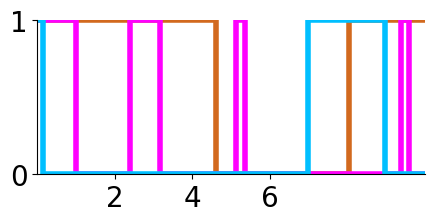

In [55]:
fig, ax = plt.subplots(figsize=(5,2))


for j in range(num_samples):
    ind = arg[j]    
    plt.plot(t_rec[:,ind], counts[:,ind,0], drawstyle='steps-post', linewidth=lw, color=sim_colors[j])

ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0, 10); plt.ylim(0, 1)    
plt.xticks([2, 4, 6],fontsize=20); plt.yticks([0, 1], ['0', '1'], fontsize=20)

name = 'gillespie_twostate'
save_file(name)
plt.show()

## e. State occupancy probabilities, two-state model

Plot state occupancy probabilities $p_0(t)$ (unmarked probability) and $p_1(t)$ (marked probability) over time for the two-state model.

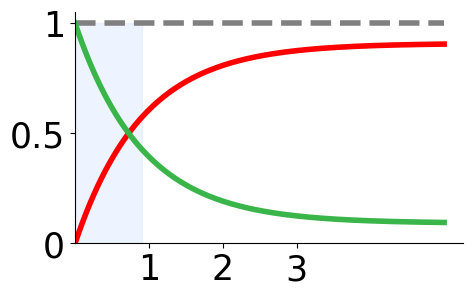

In [59]:
t_min, t_max, num_t = 0, 5, 200
t = np.linspace(t_min, t_max, num_t)


eps = 0.1; gamma = 1; params = {'eps':eps, 'gamma':gamma}
tau = 1/(eps + gamma)
_, p_t = get_probs_twostate(t, params)    # get two-state model probabilities
p_0, p_1 = p_t.T


# ------------------

fig, ax = plt.subplots(figsize=(5,3))

plt.fill_between(np.array([0,tau]), np.array([1,1]), alpha=0.25, color=c_lightblue) 
plt.plot(t, np.ones_like(t), color='gray', linestyle='--', linewidth=lw)
plt.plot(t, p_0, linewidth=lw, color=c_red)
plt.plot(t, p_1, linewidth=lw, color=c_green)


ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0,None); plt.ylim(0, 1.05)
plt.xticks([1, 2, 3],fontsize=25)
plt.yticks([0,0.5, 1], ['0','0.5', '1'], fontsize=25)

name = 'state_occ_twostate'
save_file(name)
plt.show()

## f. False-positive probability vs turnover time scale

Plot false-positive probability $\pi_1$ vs turnover time scale ($1/\gamma$) for the two-state model.

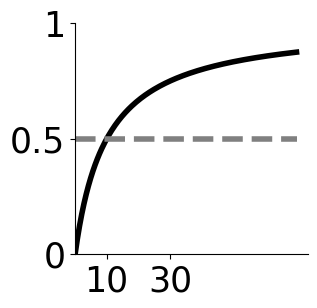

In [62]:
r_min, r_max = 0., 70; num_r = 200
r = np.linspace(r_min, r_max, num_r)

eps = 0.1
false_pos_prob = eps*r/(1 + eps*r)

# --------------------


fig, ax = plt.subplots(figsize=(3,3))

plt.plot(r, false_pos_prob, color='black', linewidth=lw)
plt.plot( r, 0.5*np.ones_like(r), linestyle='--', linewidth=lw, color='gray')

ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0.,None); plt.ylim(0, 1)
plt.xticks([10, 30], fontsize=25)
plt.yticks([0, 0.5, 1], ['0','0.5', '1'], fontsize=25)

name = 'fpp_vs_fnr'
save_file(name)
plt.show()